## EdgeDuet作图

In [8]:
%matplotlib inline
from matplotlib.pylab import *
import numpy as np
import scipy.io as sio
import matplotlib as mpl
import matplotlib.ticker as ticker
import yaml
import pathlib
import datetime
from matplotlib import collections  as mc
from core.frame import FrameProperty
import seaborn as sns

### 全局参数设置

In [30]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
matplotlib.rcParams['font.serif'] = ['Times New Roman']
# plt.rc('xtick', labelsize='x-small')
# plt.rc('ytick', labelsize='x-small')
csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Helvetica'}
tfont = {'fontname': 'Times New Roman'}
color_arr = np.array([[228,26,28], [55,126,184], [77,175,74], [152,78,163], [255,127,0], [27,158,119]])
color_arr = color_arr * 1.0 / 255
color_arr = color_arr.tolist()
hatches = ['///','+++', 'xxx', '\\\\\\', '---', 'xxx']
params = {
   'axes.labelsize': 8,
   'legend.fontsize': 10,
   'xtick.labelsize': 10,
   'ytick.labelsize': 10,
   'text.usetex': False,
    'axes.labelsize': 12,
   'figure.figsize': [4.5, 3]
   }
rcParams.update(params)


### Motivation

#### 1.1 Compare Inference Time between Edge and Device

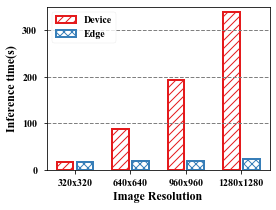

In [85]:
# data
img_sizes = ['320x320', '640x640', '960x960', '1280x1280']
device_time_cost = [16.80, 86.52, 192.74, 338.04]
edge_time_cost = [16.94, 17.99, 18.65, 22.41]

# draw
fig, ax= plt.subplots(1, 1, figsize=(4, 3))
ax.yaxis.grid(True, linestyle='--', color='gray', lw=1.)
x = np.arange(len(img_sizes))
width = 0.36
ax.bar(x - width / 2, device_time_cost, width=0.3, color='none', edgecolor=color_arr[0], 
       hatch=hatches[0], lw=2., label='Device')

ax.bar(x + width / 2, edge_time_cost, width=0.3, color='none', edgecolor=color_arr[1], 
       hatch=hatches[2], lw=2., label='Edge')

ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(img_sizes)
ax.set_ylim(0, 350)
ax.set_yticks([0, 100, 200, 300])
#ax.set_xlabel('Image Grid')
ax.set_ylabel('Inference time(s)')
ax.set_xlabel('Image Resolution')
ax.legend()
plt.savefig('infer_time_edge_and_device.png')
plt.show()


#### 1.2 Inference Accuracy with Image Resolution

Text(0, 0.5, 'F1 Accuracy')

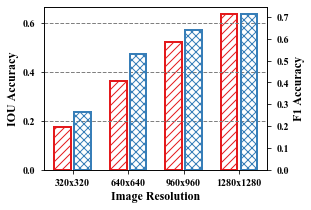

In [88]:
# data
img_sizes = ['320x320', '640x640', '960x960', '1280x1280']
iou_accuracy = [0.176, 0.361, 0.523, 0.634]
f1_accuracy = [0.264, 0.529, 0.639, 0.712]
fig, ax= plt.subplots(1, 1, figsize=(4, 3))
ax.yaxis.grid(True, linestyle='--', color='gray', lw=1.)
width = 0.36
ax.bar(x - width / 2, iou_accuracy, width=0.3, color='none', edgecolor=color_arr[0], 
       hatch=hatches[0], lw=2., label='iou')
ax2=ax.twinx()
ax2.bar(x + width / 2, f1_accuracy, width=0.3, color='none', edgecolor=color_arr[1], 
       hatch=hatches[2], lw=2., label='f1')

ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(img_sizes)
ax.set_yticks([0.0, 0.2, 0.4, 0.6])
ax.set_xlabel('Image Resolution')
ax.set_ylabel('IOU Accuracy')
ax2.set_ylabel('F1 Accuracy')

#### 1.3 Inference Accuracy with Image Quality (bitrate)

Text(0, 0.5, 'F1 Accuracy')

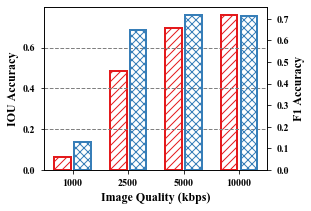

In [90]:
# data
bit_rates = [1000, 2500, 5000, 10000]
iou_accuracy = [0.063, 0.486, 0.694, 0.761]
f1_accuracy = [0.130, 0.648, 0.719, 0.713]

fig, ax= plt.subplots(1, 1, figsize=(4, 3))
ax.yaxis.grid(True, linestyle='--', color='gray', lw=1.)
width = 0.36
ax.bar(x - width / 2, iou_accuracy, width=0.3, color='none', edgecolor=color_arr[0], 
       hatch=hatches[0], lw=2., label='iou')
ax2=ax.twinx()
ax2.bar(x + width / 2, f1_accuracy, width=0.3, color='none', edgecolor=color_arr[1], 
       hatch=hatches[2], lw=2., label='f1')

ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(bit_rates)
ax.set_yticks([0.0, 0.2, 0.4, 0.6])
ax.set_xlabel('Image Quality (kbps)')
ax.set_ylabel('IOU Accuracy')
ax2.set_ylabel('F1 Accuracy')

#### 1. 4 Inference difference among Object Size


952.0
2374207.0
(80,)
486.0
1001180.0
(113,)
168.0
597212.0
(179,)
154.0
476784.0
(195,)
84.0
28539.0
(172,)


Text(0, 0.5, 'CDF')

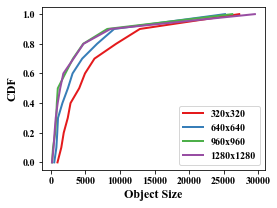

In [37]:
video_path = '/Users/wangxu/Edge/EdgeTileClient/data/drone/video_2k_120fps/uav0000138_00000_v.mp4'
frame_id = 0
fp320 = FrameProperty(video_path, frame_id, 2560, 1440)
fp320.load_bbox(pathlib.Path('/Users/wangxu/Edge/EdgeTileClient/data/drone/yolov3_320_2k_120fps/uav0000138_00000_v/'))
fp640 = FrameProperty(video_path, frame_id, 2560, 1440)
fp640.load_bbox(pathlib.Path('/Users/wangxu/Edge/EdgeTileClient/data/drone/yolov3_640_2k_120fps/uav0000138_00000_v/'))
fp960 = FrameProperty(video_path, frame_id, 2560, 1440)
fp960.load_bbox(pathlib.Path('/Users/wangxu/Edge/EdgeTileClient/data/drone/yolov3_960_2k_120fps/uav0000138_00000_v/'))
fp1280 = FrameProperty(video_path, frame_id, 2560, 1440)
fp1280.load_bbox(pathlib.Path('/Users/wangxu/Edge/EdgeTileClient/data/drone/yolov3_1280_2k_120fps/uav0000138_00000_v/'))
fp_gt = FrameProperty(video_path, frame_id, 2560, 1440)
fp_gt.load_bbox(pathlib.Path('/Users/wangxu/Edge/EdgeTileClient/data/drone/yolov3_spp_anno_2k_120fps/uav0000138_00000_v/'))

obj_sizes = [np.array([(bbox.xmax - bbox.xmin) * (bbox.ymax - bbox.ymin) for bbox in fp.bbox]) for fp in [fp320, fp640, fp960, fp1280, fp_gt]]

for i in range(5):
    print(obj_sizes[i].min())
    print(obj_sizes[i].max())
    obj_sizes[i] = obj_sizes[i][obj_sizes[i]<30000]
    obj_sizes[i].sort()
    print(obj_sizes[i].shape)
    
y = [i* 0.1 for i in range(0, 11 , 1)]
xs = []
for obj_size in obj_sizes:
    x = []
    for per_y in y:
        x.append(obj_size[int((len(obj_size) - 1) * per_y)])
    xs.append(x)

labels = ['320x320', '640x640', '960x960', '1280x1280']
fig, ax= plt.subplots(1, 1, figsize=(4, 3))
# plot(X, Y)
for i in range(4):
    ax.plot(xs[i], y, color=color_arr[i], linewidth=2., label=labels[i])
plt.legend()
ax.set_xlabel('Object Size')
ax.set_ylabel('CDF')

#### Bandwidth

save bandwidth by 0.24324324324324334


Text(0, 0.5, 'Transmission Size (MB)')

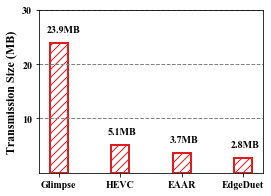

In [61]:
#ffmpeg -i *.hevc qscale:v 2 jpg/uav_%03d.jpg
# run model 608
jpeg_size = 23.9
video_size = 5.1
video_eaar = 3.7
video_duet = 2.8
# achieve
print(f"save bandwidth by {(3.7 - 2.8) / 3.7}")
# data
methods = ['Glimpse', 'HEVC', 'EAAR', 'EdgeDuet']
video_size = [jpeg_size, video_size, video_eaar, video_duet]

fig, ax= plt.subplots(1, 1, figsize=(4, 3))
ax.yaxis.grid(True, linestyle='--', color='gray', lw=1.)
width = 0.36
x = np.arange(len(methods))
ax.bar(x, video_size, width=0.3, color='none', edgecolor=color_arr[0], 
       hatch=hatches[0], lw=2., label='iou')
for i, v in enumerate(video_size):
    ax.text(i - 0.2, v + 2,  str(v) + 'MB')

ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(methods)
ax.set_yticks([10, 20, 30])
# ax.set_xlabel('Methods')
ax.set_ylabel('Transmission Size (MB)')

### drone数据集

实验设置: 针对视频uav0000137_00458_v，分别测试不同划分方式1*1， 1*2， 2*2 的检测精度

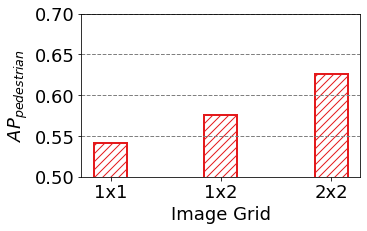

In [3]:
accuracy = [ 0.541, 0.576, 0.626]

fig, ax= plt.subplots(1, 1, figsize=(5, 3))
ax.yaxis.grid(True, linestyle='--', color='gray', lw=1.)
ax.bar([1, 2, 3], accuracy, width=0.3, color='none', edgecolor=color_arr[0], hatch=hatches[0], lw=2.)
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(['1x1', '1x2', '2x2'])
ax.set_ylim(0.5, 0.7)
ax.set_yticks([0.5, 0.55, 0.6,0.65, 0.7])
ax.set_xlabel('Image Grid')
ax.set_ylabel('$AP_{pedestrian}$')
plt.show()

### 服务器运行时间分析

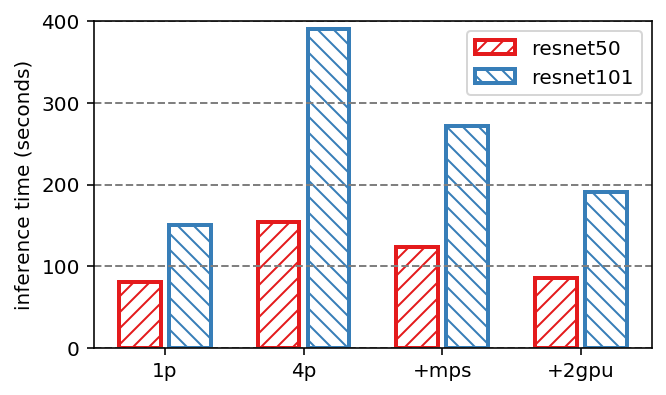

In [32]:
res101_run_time = [150, 391, 272, 191] 
res50_run_time = [80, 154, 123, 85]

fig, ax= plt.subplots(1, 1, figsize=(5, 3))
ax.yaxis.grid(True, linestyle='--', color='gray', lw=1.)
x = np.arange(len(res101_run_time))
width = 0.36
ax.bar(x - width / 2, res50_run_time, width=0.3, color='none', edgecolor=color_arr[0], hatch=hatches[0], lw=2., label='resnet50')

ax.bar(x + width / 2, res101_run_time, width=0.3, color='none', edgecolor=color_arr[1], hatch=hatches[3], lw=2., label='resnet101')

ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(['1p', '4p', '+mps', '+2gpu'])
ax.set_ylim(0, 400)
ax.set_yticks([0, 100, 200, 300, 400])
#ax.set_xlabel('Image Grid')
ax.set_ylabel('inference time (seconds)')
ax.legend()
plt.savefig('inference_time.png')
plt.show()


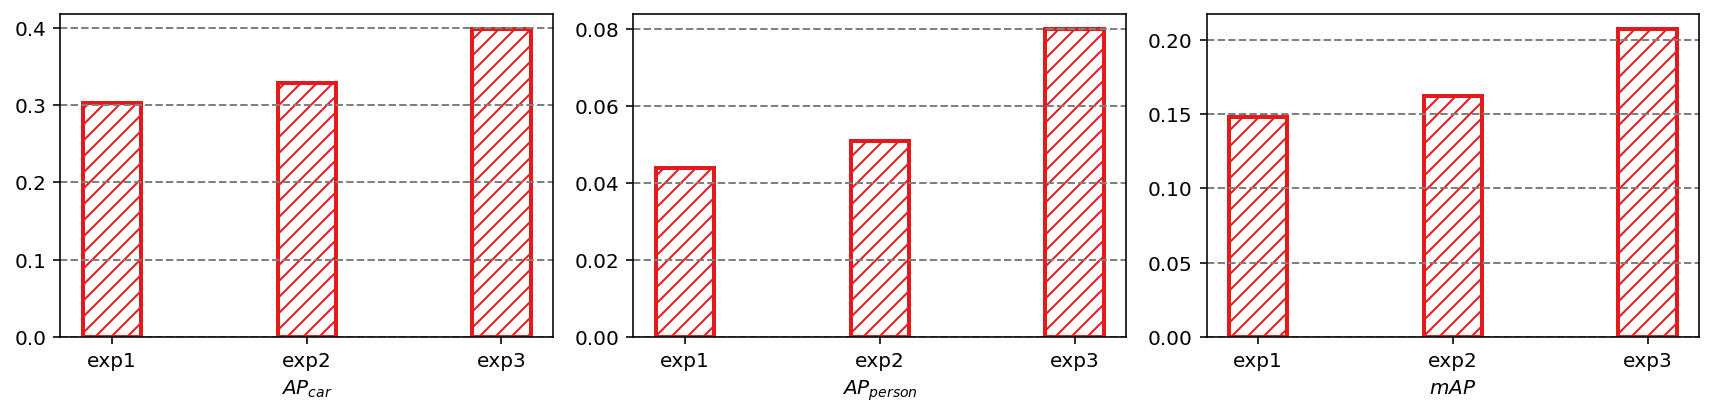

In [34]:
car_ap = [0.303, 0.329, 0.398]
person_ap = [0.044, 0.051, 0.08]
mAP = [0.148, 0.162, 0.207]

fig, (ax1, ax2, ax3)= plt.subplots(1, 3, figsize=(12, 3))
ax1.yaxis.grid(True, linestyle='--', color='gray', lw=1.)
ax2.yaxis.grid(True, linestyle='--', color='gray', lw=1.)
ax3.yaxis.grid(True, linestyle='--', color='gray', lw=1.)
x = np.arange(len(car_ap)) 

ax1.bar(x, car_ap, width=0.3, color='none', edgecolor=color_arr[0], hatch=hatches[0], lw=2., label='$ap_{car}$')

ax2.bar(x, person_ap, width=0.3, color='none', edgecolor=color_arr[0], hatch=hatches[0], lw=2., label='$ap_{car}$')

ax3.bar(x, mAP, width=0.3, color='none', edgecolor=color_arr[0], hatch=hatches[0], lw=2., label='$ap_{car}$')

# ax.bar(x + width, res101_run_time, width=0.2, color='none', edgecolor=color_arr[1], hatch=hatches[3], lw=2., label='resnet101')

ax1.set_xticks([0, 1, 2])
ax1.set_xticklabels(['exp1', 'exp2', 'exp3'])
ax1.set_xlabel('$AP_{car}$')

ax2.set_xticks([0, 1, 2])
ax2.set_xticklabels(['exp1', 'exp2', 'exp3'])
ax2.set_xlabel('$AP_{person}$')

ax3.set_xticks([0, 1, 2])
ax3.set_xticklabels(['exp1', 'exp2', 'exp3'])
ax3.set_xlabel('$mAP$')
# ax.set_ylim(0, 400)
# ax.set_yticks([0, 100, 200, 300, 400])
# #ax.set_xlabel('Image Grid')
# ax.set_ylabel('run time (seconds)')
# ax.legend()
plt.subplots_adjust(wspace =0.3, hspace =0)
plt.tight_layout()
plt.savefig('performance.png')
plt.show()


In [8]:
exp_name = '20200527'
root_path = '/Users/wangxu/Edge/EdgeTileClient/data/drone/track'
file_path = pathlib.Path(root_path) / exp_name / 'uav0000126_00001_v.yaml'
log_data = yaml.load(open(file_path, 'r'))

In [7]:
def get_timestamp(v):
    dt_from = datetime.datetime.strptime(data['Frame 0']['feed_time'], "%Y-%m-%d %H:%M:%S.%f")
    dt_obj = datetime.datetime.strptime(v, "%Y-%m-%d %H:%M:%S.%f")
    return (dt_obj - dt_from).total_seconds()
get_timestamp('2020-04-15 08:55:17.999')


KeyError: 'feed_time'

In [87]:
tiles_encoding_time = [[], [], [], []]
tiles_start_recv_time = [[], [], [], []]
tiles_recving_time = [[], [], [], []]

for frame_id, val in data.items():
    if 'feed_time' not in val:
        continue
    feed_time = get_timestamp(val['feed_time'])
    last_time = get_timestamp(val['feed_time'])
    for i in [1, 2, 3, 0]:
        tile_name = f"Tile {i}"
        if tile_name in val:
            t1 = last_time
            t2 = get_timestamp(val[tile_name]['tile_send_end_time'])
            last_time = t2
            t3 = get_timestamp(val[tile_name]['tile_recv_start_time'])
            t4 = get_timestamp(val[tile_name]['tile_recv_end_time'])
            tiles_encoding_time[i].append(t2 - t1)
            tiles_start_recv_time[i].append(t3 - feed_time)
            tiles_recving_time[i].append(t4 - t3)

In [88]:
avg_tiles_encoding_time = []
avg_tiles_start_recv_time = []
avg_tiles_recving_time = []
for i in range(4):
    avg_tiles_encoding_time.append(np.mean(tiles_encoding_time[i]))
    avg_tiles_start_recv_time.append(np.mean(tiles_start_recv_time[i]))
    avg_tiles_recving_time.append(np.mean(tiles_recving_time[i]))

In [93]:
avg_tiles_encoding_time

[0.02812499999999998, 0.077125, 0.05329166666666655, 0.022125000000000134]

In [90]:
tiles_collection_client = [[], [], [], [], [], [], [], []]
tiles_collection_client[0].append([(avg_tiles_encoding_time[1] + avg_tiles_encoding_time[2] + avg_tiles_encoding_time[3], 4), (avg_tiles_encoding_time[1] + avg_tiles_encoding_time[2] + avg_tiles_encoding_time[3] + avg_tiles_encoding_time[0], 4)])
tiles_collection_client[1].append([(0, 1), (avg_tiles_encoding_time[1], 1)])
tiles_collection_client[2].append([(avg_tiles_encoding_time[1], 2), (avg_tiles_encoding_time[1] + avg_tiles_encoding_time[2], 2)])
tiles_collection_client[3].append([(avg_tiles_encoding_time[1] + avg_tiles_encoding_time[2], 3), (avg_tiles_encoding_time[1] + avg_tiles_encoding_time[2] + avg_tiles_encoding_time[3], 3)])
tiles_collection_client[4].append([(avg_tiles_start_recv_time[0], 8), (avg_tiles_start_recv_time[0] + avg_tiles_recving_time[0], 8)])
tiles_collection_client[5].append([(avg_tiles_start_recv_time[1], 5), (avg_tiles_start_recv_time[1] + avg_tiles_recving_time[1], 5)])
tiles_collection_client[6].append([(avg_tiles_start_recv_time[2], 6), (avg_tiles_start_recv_time[2] + avg_tiles_recving_time[2], 6)])
tiles_collection_client[7].append([(avg_tiles_start_recv_time[3], 7), (avg_tiles_start_recv_time[3] + avg_tiles_recving_time[3], 7)])

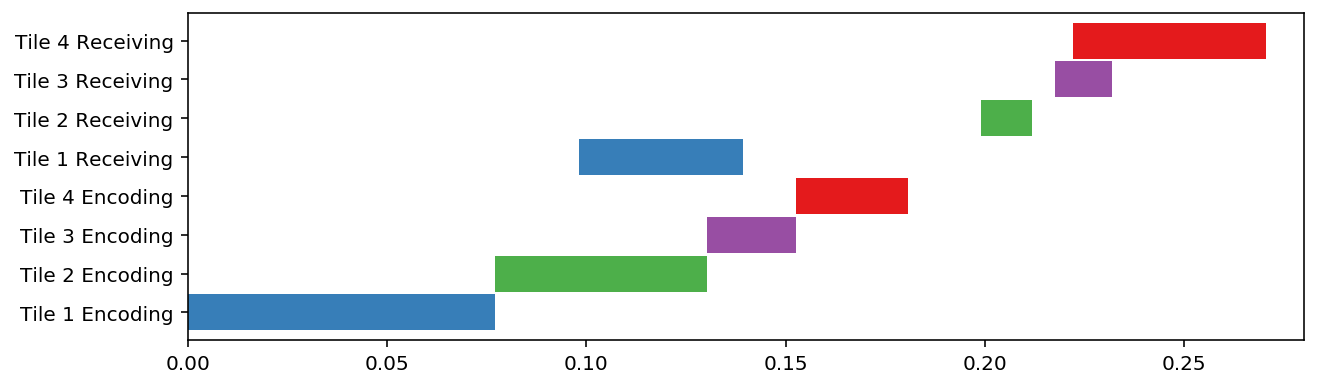

In [108]:
lw = 18
lc1 = mc.LineCollection(tiles_collection_client[0], colors=color_arr[0], linewidths=lw)
lc2 = mc.LineCollection(tiles_collection_client[1], colors=color_arr[1], linewidths=lw)
lc3 = mc.LineCollection(tiles_collection_client[2], colors=color_arr[2], linewidths=lw)
lc4 = mc.LineCollection(tiles_collection_client[3], colors=color_arr[3], linewidths=lw)
lc5 = mc.LineCollection(tiles_collection_client[4], colors=color_arr[0], linewidths=lw)
lc6 = mc.LineCollection(tiles_collection_client[5], colors=color_arr[1], linewidths=lw)
lc7 = mc.LineCollection(tiles_collection_client[6], colors=color_arr[2], linewidths=lw)
lc8 = mc.LineCollection(tiles_collection_client[7], colors=color_arr[3], linewidths=lw)
fig, ax= plt.subplots(1, 1, figsize=(10, 3))
ax.add_collection(lc1)
ax.add_collection(lc2)
ax.add_collection(lc3)
ax.add_collection(lc4)
ax.add_collection(lc5)
ax.add_collection(lc6)
ax.add_collection(lc7)
ax.add_collection(lc8)
ax.set_yticks([1, 2, 3, 4, 5, 6, 7, 8])
ax.set_yticklabels(['Tile 1 Encoding', 'Tile 2 Encoding', 'Tile 3 Encoding', 'Tile 4 Encoding', 'Tile 1 Receiving', 'Tile 2 Receiving', 'Tile 3 Receiving', 'Tile 4 Receiving'])
ax.set_xlim(0, 0.28)
ax.margins(0.1)


In [19]:
index = 0
skip = 24
tile_count = 4
recv_time = []
while True:
    if index % skip == 0:
        frame_key = f'Frame {index}'
        if frame_key in log_data:
            frame_data = log_data[frame_key]
        
            tile_recv_start = [datetime.datetime.strptime(frame_data[f'Tile {i}']['tile_recv_start_time'], "%Y-%m-%d %H:%M:%S.%f") for i in range(tile_count)]
            tile_recv_end = [datetime.datetime.strptime(frame_data[f'Tile {i}']['tile_recv_end_time'], "%Y-%m-%d %H:%M:%S.%f") for i in range(tile_count)]
            tile_recv_start_min = min(tile_recv_start)
            tile_recv_end_max = max(tile_recv_end)
            recv_time.append({'frame_id': index, 'recv_time': (tile_recv_end_max - tile_recv_start_min)})
        else:
            break
    index += 1
            


Text(0, 0.5, 'encoding frame size (KB) ')

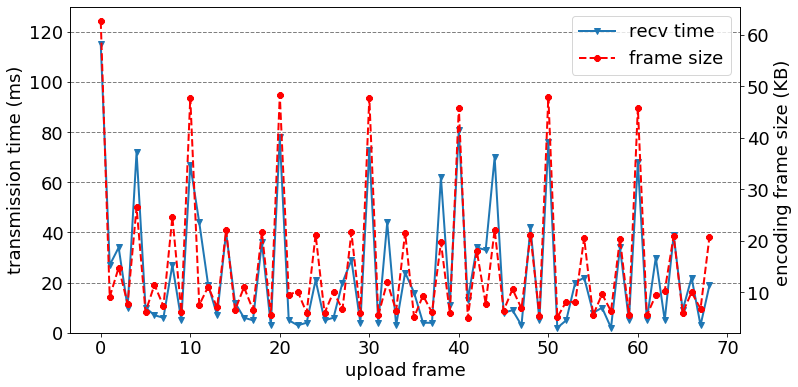

In [77]:
fig, ax= plt.subplots(1, 1, figsize=(12, 6))
ax.yaxis.grid(True, linestyle='--', color='gray', lw=1.)
l1 = ax.plot([i for i in range(len(recv_time))], [item['recv_time'] / datetime.timedelta(milliseconds=1) for item in recv_time], label='recv time', linewidth=2., linestyle='-', marker='v')
ax2=ax.twinx()
l2 = ax2.plot([i for i in range(len(hevc_size))], [item['hevc_size'] / 8000 for item in hevc_size], color='red', label='frame size', linewidth=2., linestyle='--', marker='8')
lns = l1+l2
labs = [l.get_label() for l in lns]
ax.set_ylim([0, 130])
ax.legend(lns, labs, loc=0)
ax.set_xlabel('upload frame')
ax.set_ylabel('transmission time (ms)')
ax2.set_ylabel('encoding frame size (KB) ')

In [41]:
file_path = pathlib.Path(root_path) / exp_name / 'uav0000126_00001_v.meta'
hevc_size = {}
with open(str(file_path), 'r') as f:
    for line in f.readlines():
        r2 = re.compile("(\d+),(-?\d+),(\d+)")
        item = r2.findall(line)[0]
        frame_id = int(item[0])
        tile_id = int(item[1])
        file_size = int(item[2])
        if frame_id not in hevc_size:
            hevc_size[frame_id] = 0
        if tile_id >= 0:
            hevc_size[frame_id] += file_size
hevc_size = [{'frame_id': k, 'hevc_size': v} for k, v in hevc_size.items()]
hevc_size = sorted(hevc_size, key=lambda x: x['frame_id'])

In [42]:
hevc_size

[{'frame_id': 0, 'hevc_size': 500939},
 {'frame_id': 24, 'hevc_size': 72485},
 {'frame_id': 48, 'hevc_size': 118366},
 {'frame_id': 72, 'hevc_size': 62280},
 {'frame_id': 96, 'hevc_size': 212127},
 {'frame_id': 120, 'hevc_size': 49219},
 {'frame_id': 144, 'hevc_size': 91701},
 {'frame_id': 168, 'hevc_size': 58250},
 {'frame_id': 192, 'hevc_size': 197048},
 {'frame_id': 216, 'hevc_size': 49413},
 {'frame_id': 240, 'hevc_size': 382483},
 {'frame_id': 264, 'hevc_size': 60176},
 {'frame_id': 288, 'hevc_size': 88617},
 {'frame_id': 312, 'hevc_size': 56241},
 {'frame_id': 336, 'hevc_size': 176390},
 {'frame_id': 360, 'hevc_size': 52116},
 {'frame_id': 384, 'hevc_size': 87791},
 {'frame_id': 408, 'hevc_size': 52709},
 {'frame_id': 432, 'hevc_size': 173155},
 {'frame_id': 456, 'hevc_size': 43854},
 {'frame_id': 480, 'hevc_size': 386792},
 {'frame_id': 504, 'hevc_size': 76281},
 {'frame_id': 528, 'hevc_size': 81111},
 {'frame_id': 552, 'hevc_size': 47833},
 {'frame_id': 576, 'hevc_size': 169528

In [17]:
group = ['4g_211', '5g', '24g']

group_net_routine = {}

for gid, gr in enumerate(group):
    for i in range(3):
        g1 = gr + '_' + str(i + 1)
        print(g1)
        file_path = f'/Users/wangxu/Edge/EdgeTileClient/data/drone/track/network_test/{g1}/{g1}.yaml'
        gr_data = yaml.load(open(file_path, 'r'))
        validate_count = 0
        for k, v in gr_data.items():
            frame_id = int(k.split(' ')[1])
            print(frame_id)
            if 'updoad_frame_time' in v and 'bbox_recv_time' in v:
                t1 = datetime.datetime.strptime(v['updoad_frame_time'], "%Y-%m-%d %H:%M:%S.%f")
                t2 = datetime.datetime.strptime(v['bbox_recv_time'], "%Y-%m-%d %H:%M:%S.%f")
                delta_t = (t2 - t1).total_seconds() * 1000
                if gr not in group_net_routine:
                    group_net_routine[gr] = []
                    for j in range(40):
                        group_net_routine[gr].append(0)
                if frame_id / 24 < 40:
                    group_net_routine[gr][int(frame_id / 24)] += (delta_t / 3.0)
                    validate_count += 1
        if validate_count != 20:
            print("maybe fault")
        else:
            print("pass validate")


4g_211_1
0
24
48
72
96
120
144
168
192
216
240
264
288
312
336
360
384
408
432
456
480
504
528
552
576
600
624
648
672
696
720
744
768
792
816
840
864
888
912
936
960
984
1008
1032
1056
1080
1104
1128
1152
1176
1200
1224
1248
1272
1296
1320
1344
1368
1392
1416
1440
1464
1488
1512
1536
1560
1584
1608
1632
maybe fault
4g_211_2
0
24
48
72
96
120
144
168
192
216
240
264
288
312
336
360
384
408
432
456
480
504
528
552
576
600
624
648
672
696
720
744
768
792
816
840
864
888
912
936
960
984
1008
1032
1056
1080
1104
1128
1152
1176
1200
1224
1248
1272
1296
1320
1344
1368
1392
1416
1440
1464
1488
1512
1536
1560
1584
1608
1632
maybe fault
4g_211_3
0
24
48
72
96
120
144
168
192
216
240
264
288
312
336
360
384
408
432
456
480
504
528
552
576
600
624
648
672
696
720
744
768
792
816
840
864
888
912
936
960
984
1008
1032
1056
1080
1104
1128
1152
1176
1200
1224
1248
1272
1296
1320
1344
1368
1392
1416
1440
1464
1488
1512
1536
1560
1584
1608
1632
maybe fault
5g_1
0
24
48
72
96
120
144
168
192
216
240
264

In [18]:
group_net_routine

{'4g_211': [534.6666666666667,
  313.3333333333333,
  262.6666666666667,
  169.0,
  245.33333333333337,
  180.33333333333334,
  184.66666666666666,
  167.33333333333331,
  240.0,
  206.33333333333334,
  323.66666666666663,
  189.66666666666669,
  188.33333333333331,
  175.66666666666669,
  230.66666666666663,
  202.66666666666669,
  189.33333333333331,
  174.0,
  226.66666666666669,
  178.33333333333334,
  295.3333333333333,
  219.0,
  192.66666666666666,
  169.0,
  235.66666666666663,
  183.66666666666669,
  201.0,
  181.0,
  239.33333333333334,
  181.0,
  293.3333333333333,
  178.0,
  193.33333333333331,
  169.33333333333334,
  236.0,
  176.0,
  202.66666666666669,
  200.0,
  246.0,
  174.33333333333334],
 '5g': [304.0,
  171.66666666666666,
  191.0,
  139.0,
  184.33333333333334,
  132.33333333333331,
  149.66666666666669,
  133.66666666666666,
  193.33333333333331,
  129.33333333333331,
  219.33333333333331,
  140.66666666666666,
  145.66666666666666,
  139.66666666666666,
  171.0,

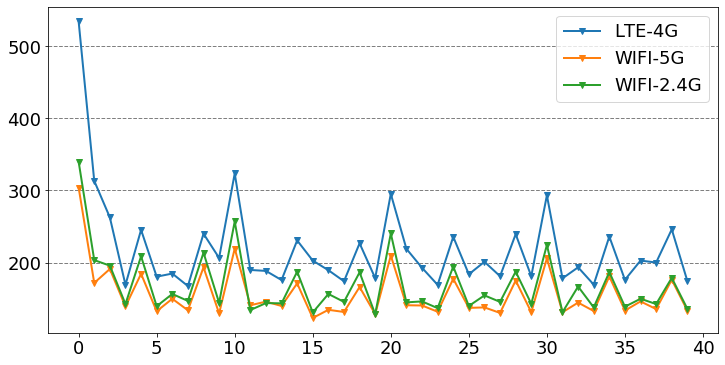

In [20]:
labels = {'4g_211': 'LTE-4G', '5g': 'WIFI-5G', '24g': 'WIFI-2.4G'}
fig, ax= plt.subplots(1, 1, figsize=(12, 6))
ax.yaxis.grid(True, linestyle='--', color='gray', lw=1.)

for k, v in group_net_routine.items():
    l1 = ax.plot([i for i in range(40)], v, label=labels[k], linewidth=2., linestyle='-', marker='v')
plt.legend()